In [1]:
!gdown --id 1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs -O historical_trader.csv

/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs
To: /content/historical_trader.csv
100% 47.5M/47.5M [00:01<00:00, 46.0MB/s]


In [2]:
!gdown --id 1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf -O fear_greed.csv


/usr/local/lib/python3.12/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf
To: /content/fear_greed.csv
100% 90.8k/90.8k [00:00<00:00, 3.82MB/s]


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_predict

In [4]:
historical_trader_df = pd.read_csv('historical_trader.csv')
fear_greed_df = pd.read_csv('fear_greed.csv')

In [5]:
historical_trader_df

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0000,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211219,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,382.20,420.80,SELL,25-04-2025 15:35,7546.600000,Close Long,-20.2566,0xcd339c08dc7b615a993c0422374d8e02027400092bc2...,88803313862,False,0.042080,1.990000e+14,1.750000e+12
211220,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,2124.10,2338.63,SELL,25-04-2025 15:35,7164.400000,Close Long,-112.5773,0x29e8ede2a3a37aa0eac00422374d8e02029b00ac9f3c...,88803313862,False,0.233863,9.260000e+14,1.750000e+12
211221,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,423.40,466.16,SELL,25-04-2025 15:35,5040.300000,Close Long,-22.4402,0x0780085b0c0a943eea800422374d920204c100edf579...,88803313862,False,0.046616,6.930000e+14,1.750000e+12
211222,0x72743ae2822edd658c0c50608fd7c5c501b2afbd,FARTCOIN,1.1010,3599.80,3963.38,SELL,25-04-2025 15:35,4616.900000,Close Long,-190.7894,0x349c29934913b25c89e20422374d920204cd008b8a0e...,88803313862,False,0.396337,4.180000e+14,1.750000e+12


In [7]:
historical_trader_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [8]:
historical_trader_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [9]:
historical_trader_df.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


In [10]:
historical_trader_df.isnull().sum()

,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0


In [6]:
fear_greed_df

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05
...,...,...,...,...
2639,1745818200,54,Neutral,2025-04-28
2640,1745904600,60,Greed,2025-04-29
2641,1745991000,56,Greed,2025-04-30
2642,1746077400,53,Neutral,2025-05-01


In [12]:
fear_greed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [13]:
fear_greed_df.describe()

,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000


In [25]:
historical_trader_df['Timestamp'] = pd.to_datetime(
    historical_trader_df['Timestamp IST'],
    format='%d-%m-%Y %H:%M'
)
historical_trader_df['date_only'] = historical_trader_df['Timestamp'].dt.date


In [26]:
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
fear_greed_df['date_only'] = fear_greed_df['date'].dt.date


In [27]:
daily_trader = (
    historical_trader_df.groupby('date_only')
    .agg({
        'Closed PnL': ['mean', 'sum'],
        'Size USD': 'sum',
        'Size Tokens': 'sum',
        'Execution Price': 'mean',
        'Fee': 'sum'
    })
)
daily_trader.columns = ['mean_pnl','total_pnl','total_volume_usd','total_volume_tokens','avg_exec_price','total_fee']
daily_trader = daily_trader.reset_index()


In [28]:
daily_trader

,date_only,mean_pnl,total_pnl,total_volume_usd,total_volume_tokens,avg_exec_price,total_fee
0,2023-05-01,0.000000,0.000000,477.00,2.513000e-01,1898.133333,0.000000
1,2023-12-05,0.000000,0.000000,50005.83,1.180901e+01,11038.300000,12.501455
2,2023-12-14,-18.675885,-205.434737,113203.35,4.092289e+03,8031.868818,28.300831
3,2023-12-15,-12.316017,-24.632034,10609.95,3.558000e+03,2.982000,2.652489
4,2023-12-16,0.000000,0.000000,15348.77,3.989700e+04,0.384707,3.837189
...,...,...,...,...,...,...,...
475,2025-04-27,8.018004,2702.067468,487537.69,3.887430e+06,13133.751885,55.926773
476,2025-04-28,26.763462,36906.813759,26124921.49,2.152493e+05,58469.141862,6007.251404
477,2025-04-29,56.063136,125749.613427,34089511.66,2.974820e+05,28548.785993,5149.295287
478,2025-04-30,12.582028,14003.797269,12693878.85,1.559761e+05,35649.303644,2950.183773


In [29]:
merged_df = pd.merge(
    daily_trader,
    fear_greed_df[['date_only','value','classification']],
    on='date_only',
    how='inner'
)

In [30]:
print("Merged shape:", merged_df.shape)
print(merged_df.head())


Merged shape: (479, 9)
    date_only   mean_pnl   total_pnl  total_volume_usd  total_volume_tokens  \
0  2023-05-01   0.000000    0.000000            477.00              0.25130   
1  2023-12-05   0.000000    0.000000          50005.83             11.80901   
2  2023-12-14 -18.675885 -205.434737         113203.35           4092.28901   
3  2023-12-15 -12.316017  -24.632034          10609.95           3558.00000   
4  2023-12-16   0.000000    0.000000          15348.77          39897.00000   

   avg_exec_price  total_fee  value classification  
0     1898.133333   0.000000     63          Greed  
1    11038.300000  12.501455     75  Extreme Greed  
2     8031.868818  28.300831     72          Greed  
3        2.982000   2.652489     70          Greed  
4        0.384707   3.837189     67          Greed  


In [37]:
pnl_by_sentiment = merged_df.groupby('classification')['total_pnl'].mean().sort_values()
print("\nAvg Total PnL by Sentiment:\n", pnl_by_sentiment)


Avg Total PnL by Sentiment:
 classification
Greed            11140.566181
Neutral          19297.323516
Extreme Greed    23817.292199
Fear             36891.818040
Extreme Fear     52793.589178
Name: total_pnl, dtype: float64


In [49]:
print("Sentiment Counts:\n", merged_df['classification'].value_counts())


Sentiment Counts:
 classification
Greed            193
Extreme Greed    114
Fear              91
Neutral           67
Extreme Fear      14
Name: count, dtype: int64


In [50]:
merged_df['win'] = merged_df['total_pnl'] > 0
winrate = merged_df.groupby('classification')['win'].mean()*100
print("\nWin Rate by Sentiment:\n", winrate)


Win Rate by Sentiment:
 classification
Extreme Fear     64.285714
Extreme Greed    87.719298
Fear             73.626374
Greed            72.538860
Neutral          67.164179
Name: win, dtype: float64


In [51]:
volatility = merged_df.groupby('classification')['total_pnl'].std()
print("\nPnL Volatility by Sentiment:\n", volatility)



PnL Volatility by Sentiment:
 classification
Extreme Fear     101262.394065
Extreme Greed     72827.301581
Fear              96611.848503
Greed             62427.957949
Neutral           37995.209071
Name: total_pnl, dtype: float64


In [39]:
corr = merged_df[['mean_pnl','total_pnl','total_volume_usd','avg_exec_price','value']].corr()
print("\nCorrelation Matrix:\n", corr)



Correlation Matrix:
                   mean_pnl  total_pnl  total_volume_usd  avg_exec_price  \
mean_pnl          1.000000   0.376053          0.013028        0.003538   
total_pnl         0.376053   1.000000          0.325759       -0.024298   
total_volume_usd  0.013028   0.325759          1.000000        0.206365   
avg_exec_price    0.003538  -0.024298          0.206365        1.000000   
value             0.037315  -0.082642         -0.264371       -0.060238   

                     value  
mean_pnl          0.037315  
total_pnl        -0.082642  
total_volume_usd -0.264371  
avg_exec_price   -0.060238  
value             1.000000  


In [52]:
fear_days = merged_df[merged_df['classification'].str.contains("Fear")]['mean_pnl']
greed_days = merged_df[merged_df['classification'].str.contains("Greed")]['mean_pnl']

In [55]:
t_stat, p_val = ttest_ind(fear_days, greed_days, equal_var=False)
print("\nT-test result: t-stat =", t_stat, ", p-value =", p_val)


T-test result: t-stat = -0.9635304411850639 , p-value = 0.33651764894130143


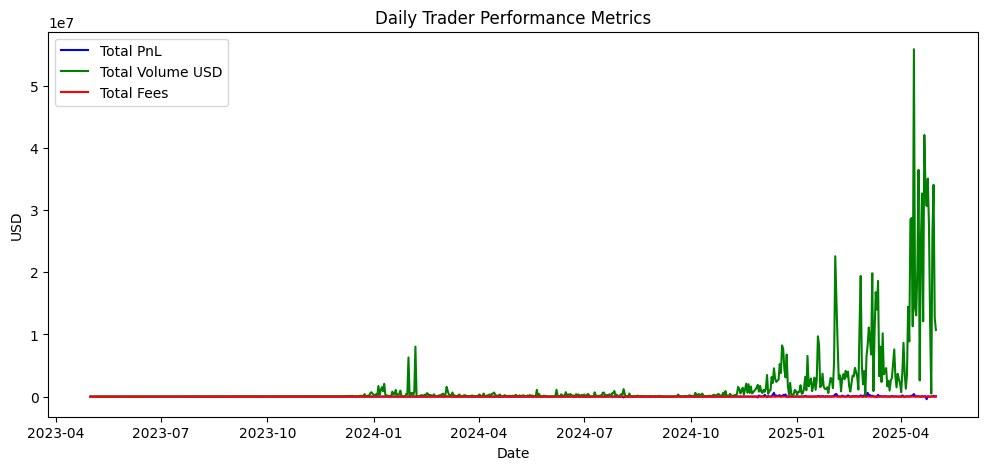

In [128]:
plt.figure(figsize=(12,5))
plt.plot(merged_df['date_only'], merged_df['total_pnl'], label="Total PnL", color='blue')
plt.plot(merged_df['date_only'], merged_df['total_volume_usd'], label="Total Volume USD", color='green')
plt.plot(merged_df['date_only'], merged_df['total_fee'], label="Total Fees", color='red')
plt.title("Daily Trader Performance Metrics")
plt.xlabel("Date")
plt.ylabel("USD")
plt.legend()
plt.show()

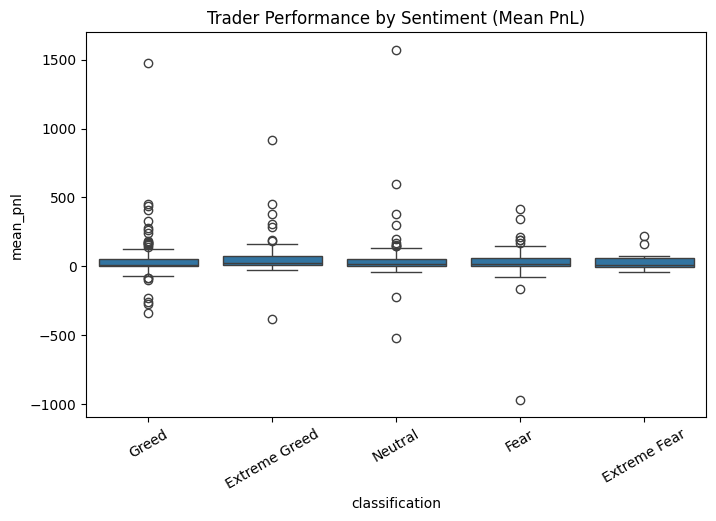

In [56]:
# Boxplot of PnL
plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='mean_pnl', data=merged_df)
plt.title("Trader Performance by Sentiment (Mean PnL)")
plt.xticks(rotation=30)
plt.show()

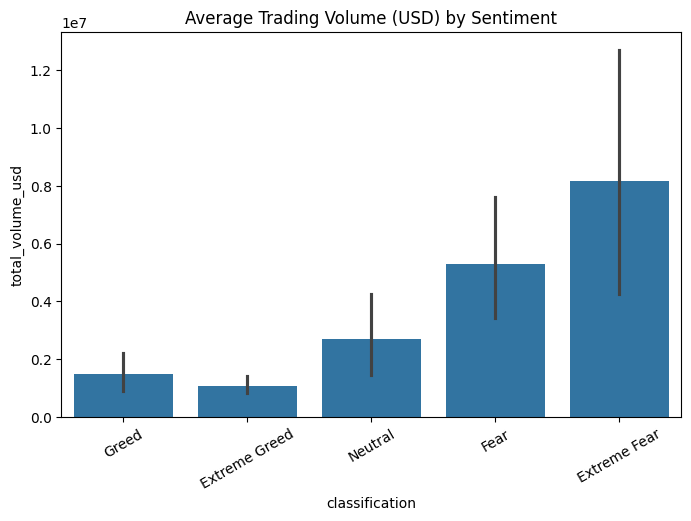

In [57]:
plt.figure(figsize=(8,5))
sns.barplot(x='classification', y='total_volume_usd', data=merged_df, estimator='mean')
plt.title("Average Trading Volume (USD) by Sentiment")
plt.xticks(rotation=30)
plt.show()

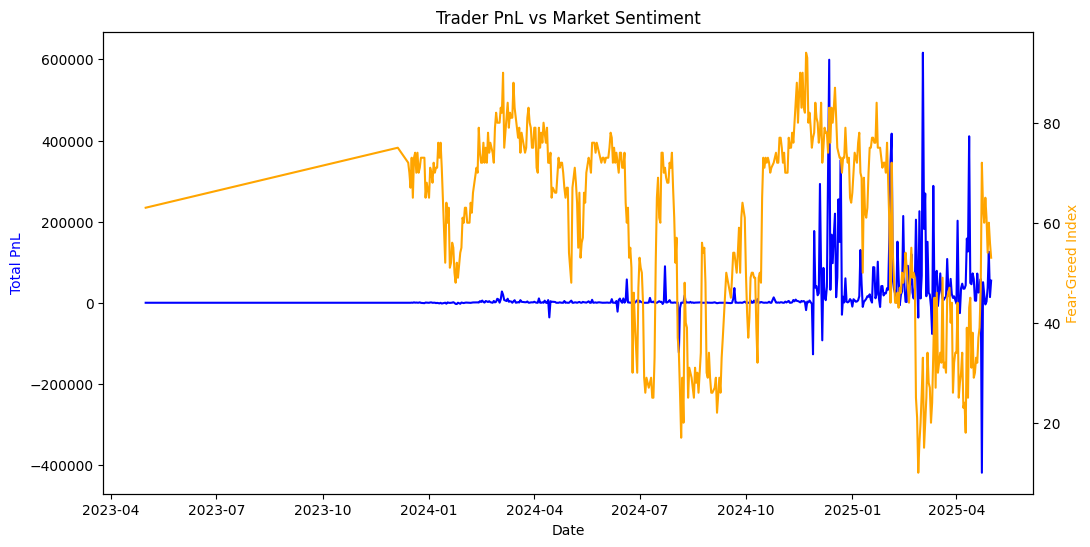

In [59]:
# Time series PnL vs Sentiment
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(merged_df['date_only'], merged_df['total_pnl'], color='blue', label="Total PnL")
ax2 = ax1.twinx()
ax2.plot(merged_df['date_only'], merged_df['value'], color='orange', label="Fear-Greed Index")
ax1.set_xlabel("Date")
ax1.set_ylabel("Total PnL", color="blue")
ax2.set_ylabel("Fear-Greed Index", color="orange")
plt.title("Trader PnL vs Market Sentiment")
plt.show()

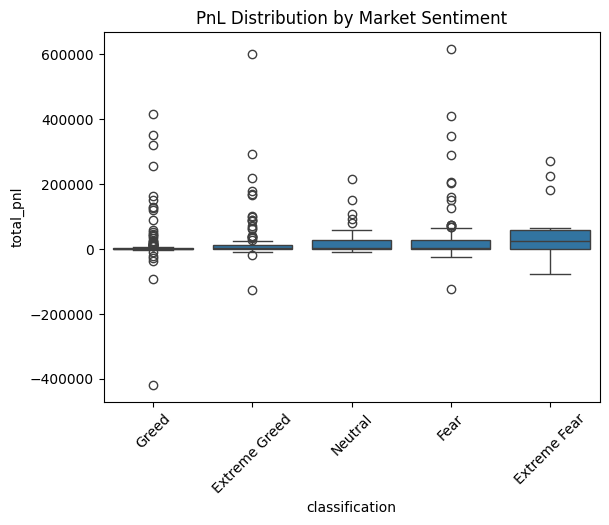

In [60]:
# PnL Distribution by Sentiment
sns.boxplot(x="classification", y="total_pnl", data=merged_df)
plt.title("PnL Distribution by Market Sentiment")
plt.xticks(rotation=45)
plt.show()

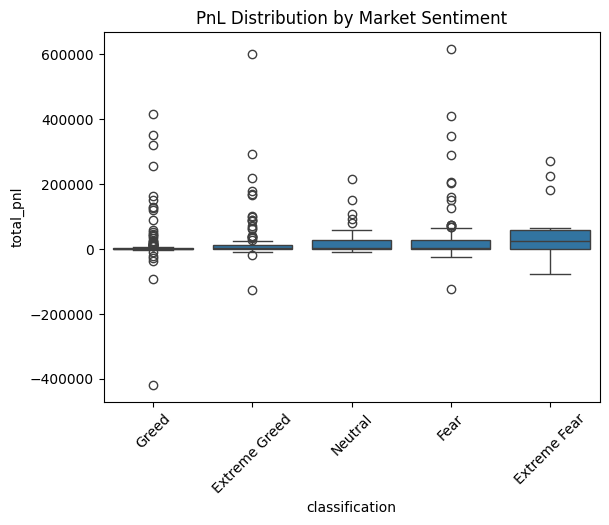

In [61]:
# PnL Distribution by Sentiment
sns.boxplot(x="classification", y="total_pnl", data=merged_df)
plt.title("PnL Distribution by Market Sentiment")
plt.xticks(rotation=45)
plt.show()

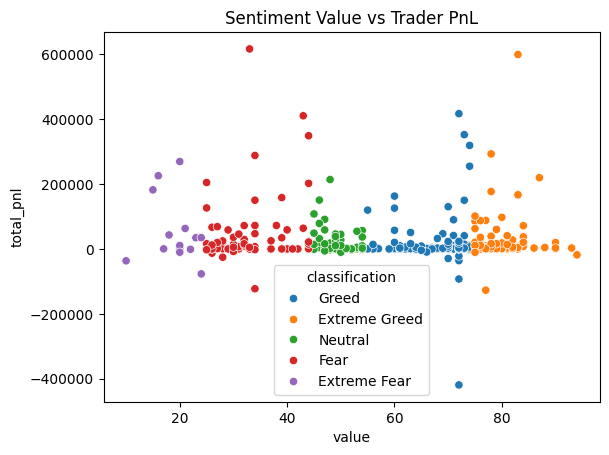

In [62]:
# Scatter: Sentiment vs PnL
sns.scatterplot(x="value", y="total_pnl", hue="classification", data=merged_df)
plt.title("Sentiment Value vs Trader PnL")
plt.show()


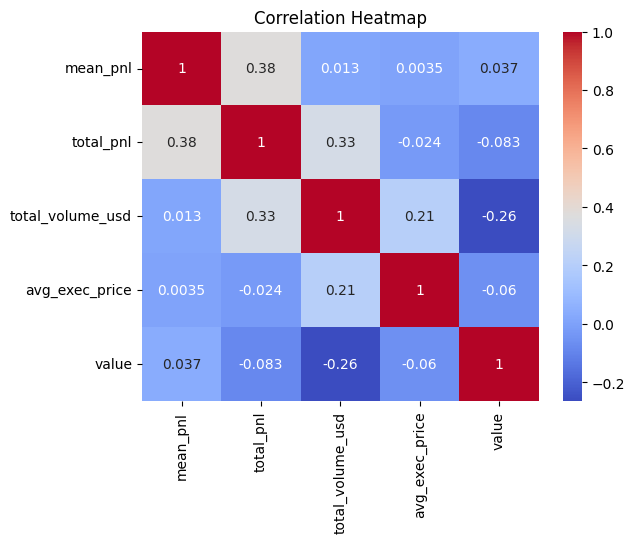

In [63]:
# Correlation heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


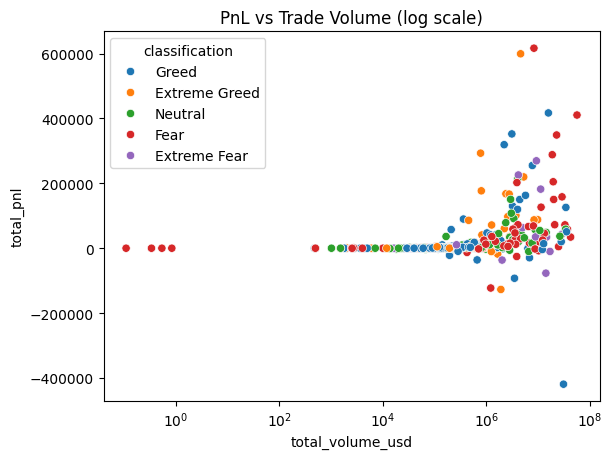

In [64]:
# PnL vs Volume
sns.scatterplot(x="total_volume_usd", y="total_pnl", hue="classification", data=merged_df)
plt.xscale("log")
plt.title("PnL vs Trade Volume (log scale)")
plt.show()

/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.12/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


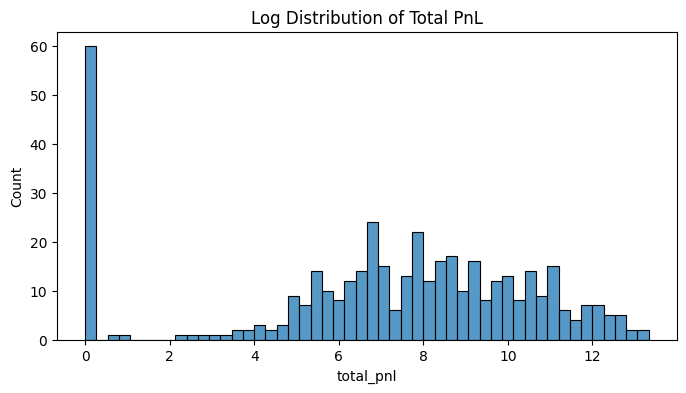

In [130]:
import numpy as np
plt.figure(figsize=(8,4))
sns.histplot(np.log1p(merged_df['total_pnl']), bins=50)
plt.title("Log Distribution of Total PnL")
plt.show()

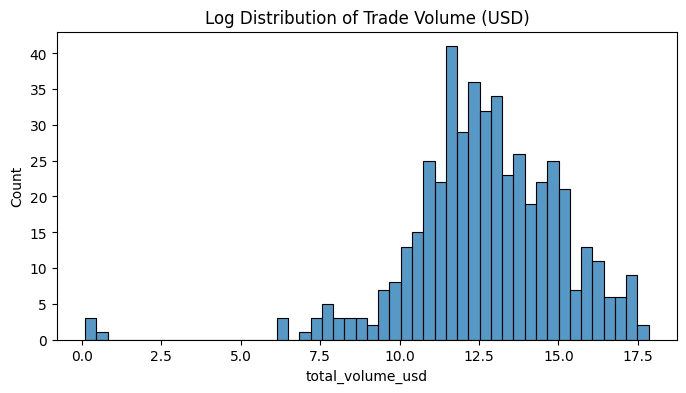

In [131]:
plt.figure(figsize=(8,4))
sns.histplot(np.log1p(merged_df['total_volume_usd']), bins=50)
plt.title("Log Distribution of Trade Volume (USD)")
plt.show()

In [96]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE

In [97]:
le = LabelEncoder()
merged_df['class_encoded'] = le.fit_transform(merged_df['classification'])

In [98]:
X = merged_df.drop(['classification', 'class_encoded', 'date_only'], axis=1)
y = merged_df['class_encoded']

In [99]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


In [101]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [102]:
print("Class distribution after SMOTE:", dict(zip(le.classes_,
      [sum(y_train_res == i) for i in range(len(le.classes_))])))

Class distribution after SMOTE: {'Extreme Fear': 154, 'Extreme Greed': 154, 'Fear': 154, 'Greed': 154, 'Neutral': 154}


In [107]:
log_reg = LogisticRegression(max_iter=1000, class_weight="balanced")

In [108]:
log_reg.fit(X_train_res, y_train_res)

y_pred_log = log_reg.predict(X_test)

In [110]:
print("Logistic regression")
print(classification_report(y_test, y_pred_log, target_names=le.classes_))


Logistic regression
               precision    recall  f1-score   support

 Extreme Fear       1.00      1.00      1.00         3
Extreme Greed       1.00      1.00      1.00        23
         Fear       1.00      1.00      1.00        18
        Greed       1.00      1.00      1.00        39
      Neutral       1.00      1.00      1.00        13

     accuracy                           1.00        96
    macro avg       1.00      1.00      1.00        96
 weighted avg       1.00      1.00      1.00        96



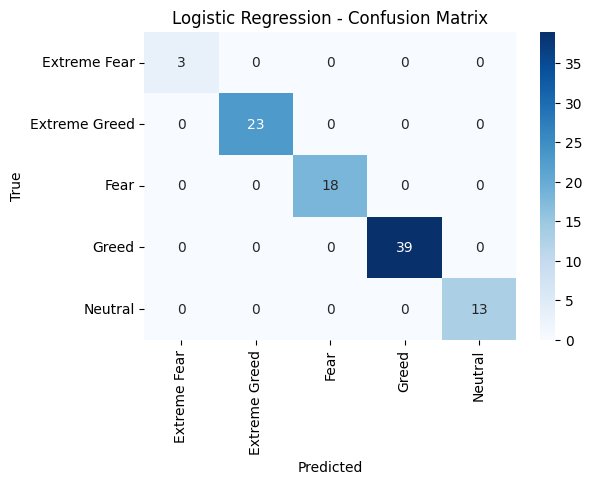

In [111]:
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(6,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [112]:
rf = RandomForestClassifier(n_estimators=200, class_weight="balanced", random_state=42)


In [113]:
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

In [114]:
print("Random Forest")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

Random Forest
               precision    recall  f1-score   support

 Extreme Fear       1.00      1.00      1.00         3
Extreme Greed       1.00      1.00      1.00        23
         Fear       1.00      1.00      1.00        18
        Greed       1.00      1.00      1.00        39
      Neutral       1.00      1.00      1.00        13

     accuracy                           1.00        96
    macro avg       1.00      1.00      1.00        96
 weighted avg       1.00      1.00      1.00        96



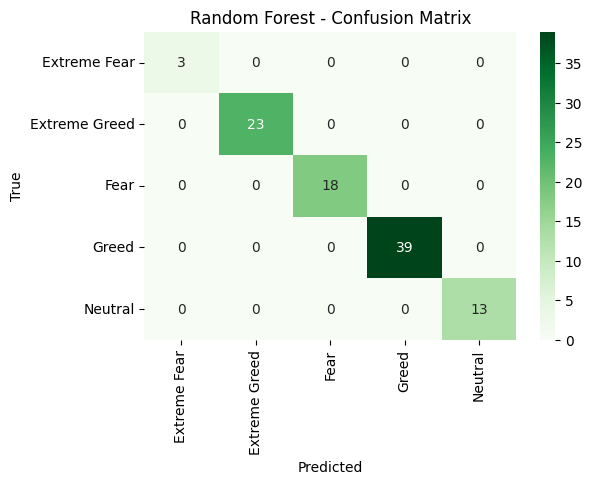

In [115]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap="Greens", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [121]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric="mlogloss")

In [122]:
xgb.fit(X_train_res, y_train_res)
y_pred_xgb = xgb.predict(X_test)

In [123]:
print(classification_report(y_test, y_pred_xgb, target_names=le.classes_))

               precision    recall  f1-score   support

 Extreme Fear       1.00      1.00      1.00         3
Extreme Greed       1.00      1.00      1.00        23
         Fear       1.00      1.00      1.00        18
        Greed       1.00      1.00      1.00        39
      Neutral       1.00      1.00      1.00        13

     accuracy                           1.00        96
    macro avg       1.00      1.00      1.00        96
 weighted avg       1.00      1.00      1.00        96



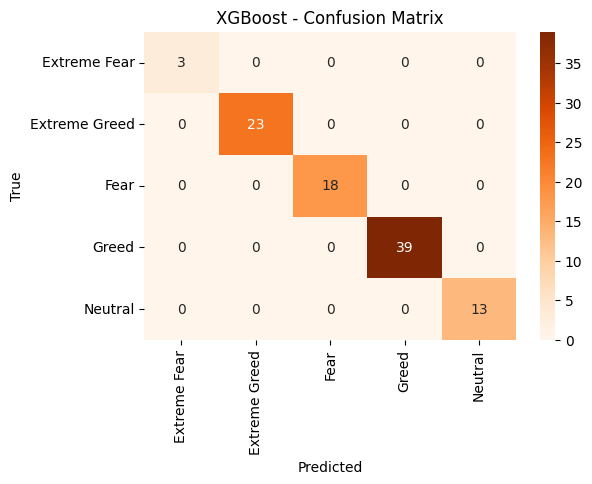

In [124]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap="Oranges", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [136]:
feature_importance_rf = pd.DataFrame({
    'Features': X.columns,
    'Importances': rf.feature_importances_
})

In [138]:
feature_importance_rf.sort_values('Importances', ascending=False, inplace=True)

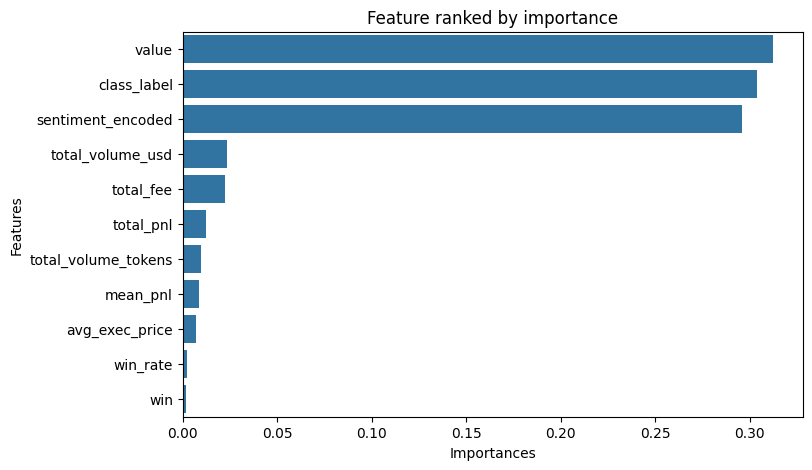

In [142]:
plt.figure(figsize=(8,5))
sns.barplot(x='Importances', y='Features', data=feature_importance_rf)
plt.title("Feature ranked by importance")
plt.show()